In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Acquire data

In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Explanatory analysis on given features

7 features are shortlisted for analysis. <b>Categorical feature</b>: Pclass, Sex, Embarked; <b>Numerical features</b>: Age, SibSp, Parch, Fare.

# 1. Pclass & Sex

Two observations can be summarized from the following graphs.
1. More than half of Class 1 passengers have larger chance of survival. <b>Likelihood of survival: Class 1 > Class 2 > Class 3.</b>
2. Most of the female survived while most male died. Female has a larger chance of survival.

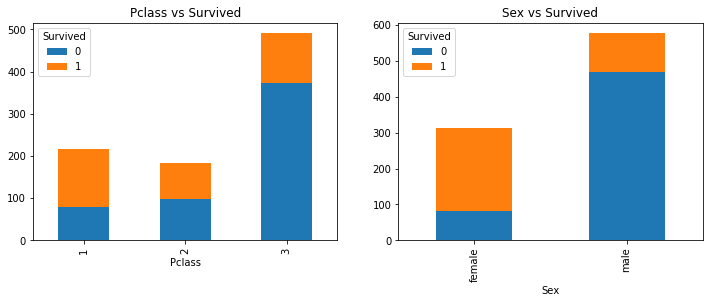

In [4]:
f, ax=plt.subplots(1, 2, figsize=(12,4))
train_df[['Survived', 'Pclass']].pivot_table(index='Pclass', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Pclass vs Survived')
train_df[['Survived', 'Sex']].pivot_table(index='Sex', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Sex vs Survived')
plt.show()

The following graph tells the same story.

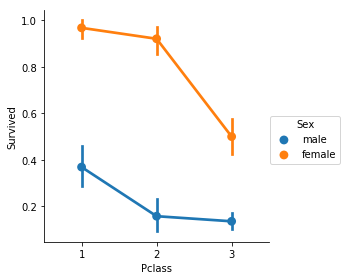

In [5]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)

## 2. Age

Observations on Age:<br/>
1. Most of the passengers are between 20-40 years' old.<br/>
2. The number of young children below 10 years' old increases from Class 1 to 3. The children have larger chance of survival in all three classes.<br/>
3. Class 1 passengers below 40 years' old have survival rate of higher than 50%, whereas the Class 2, 3 passengers at young ages have higher death rate.<br/>
4. Among the children below 10, the majority of young boys were survived, while most of the young girls are dead.<br/>
5. Among the passengers in the middle age, female has larger survival rate than male.

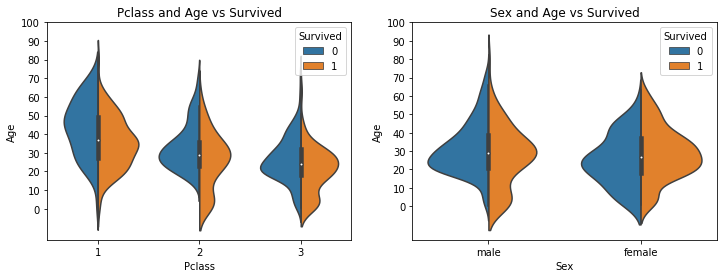

In [6]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 3. No. of family: siblings/spouses, parents/children

It can be observed that most of the passengers have fewer than 2 siblings/spouses, and fewer than 3 parents/children onboard.

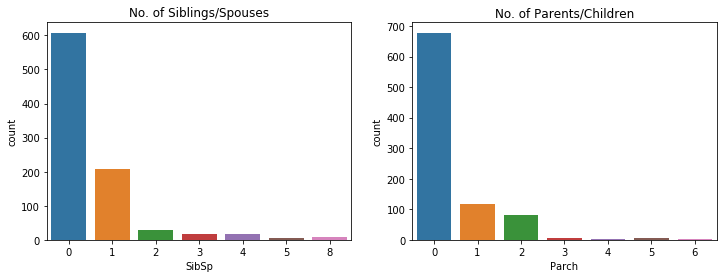

In [7]:
f, ax=plt.subplots(1, 2, figsize=(12, 4))
sns.countplot('SibSp', data=train_df, ax=ax[0])
ax[0].set_title('No. of Siblings/Spouses')
sns.countplot('Parch', data=train_df, ax=ax[1])
ax[1].set_title('No. of Parents/Children')
plt.show()

A new feature <i>'FamilySize'</i> can be created by summing up <i>'SibSp'</i> and <i>'Parch'</i>.

In [12]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


Observation from the following stacked bar charts:
1. Most of the passengers did not have family onboard.<br/>
2. Passengers with 1 sibling/spouse, 1 or 2 parents/children onboard has the largest survival rate.<br/>
3. Passengers with more than 1 siblings, or more than 2 children/parents have low survival rate.

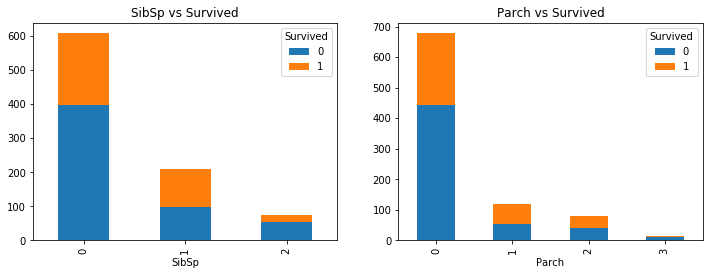

In [10]:
f, ax=plt.subplots(1, 2, figsize=(12,4))
grouped_family_train_df[['Survived', 'SibSp']].pivot_table(index='SibSp', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
grouped_family_train_df[['Survived', 'Parch']].pivot_table(index='Parch', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

# Fare

c:\users\pa273mc\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


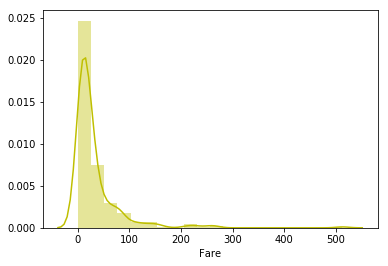

In [14]:
sns.distplot(grouped_family_train_df['Fare'], bins=20, color="y")

In [18]:
import numpy as np
np.isnan(2)

False

In [22]:
len(train_df)

891